<a href="https://colab.research.google.com/github/geffenmoser/di_tta114_geffen_moser/blob/main/miniproject%20week%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'mental-health-in-tech-survey:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F311%2F673%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240618%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240618T155543Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D902fc3491494b28b5cd5cbe5e385b267b44179119969be48467eb0a475549e26e2a9fc7f07c63068a6de73c4890472181190f21720d4e8beaf50f3567067a76f190fb0d51c129870f9dc09e976879a5bb781aac8ecdf5cc8c293bb7e26636289d4b3344e3b0dc72f39a12fbf9c547c76e4608cf6d197a805309e945ca045731b2558b723b64fd6c54eea2acce19ecd0c833813f024f9ce260776c82c1fbe25ade0b5e0ad74e0eba926399562b6b0bd507419a9eb71ce420b680f2428ba46f80a337fbb7c1c0491fd22ea2abe5593b24568ad1c9425907d8cbcd369f7c82c93d131b309c39157e029aa645f93b39a49ee2dd4071daba9d5e9630e01e53b80ef8e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 49930 bytes downloaded
Downloaded and uncompressed: mental-health-in-tech-survey
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-in-tech-survey/survey.csv


In [3]:
mh_data = pd.read_csv('/kaggle/input/mental-health-in-tech-survey/survey.csv')

# Explore the dataset
print(mh_data.head())
print(mh_data.info())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [4]:
missing_data = mh_data.isnull()
print(missing_data.head())


missing_counts = mh_data.isnull().sum()
print(missing_counts)


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mh_data['Age_normalized'] = scaler.fit_transform(mh_data[['Age']])
print(mh_data['Age_normalized'].head())

   Timestamp    Age  Gender  Country  state  self_employed  family_history  \
0      False  False   False    False  False           True           False   
1      False  False   False    False  False           True           False   
2      False  False   False    False   True           True           False   
3      False  False   False    False   True           True           False   
4      False  False   False    False  False           True           False   

   treatment  work_interfere  no_employees  ...  leave  \
0      False           False         False  ...  False   
1      False           False         False  ...  False   
2      False           False         False  ...  False   
3      False           False         False  ...  False   
4      False           False         False  ...  False   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                      False                    False      False       False   
1                     

In [6]:
mh_data.drop(["comments", "state"], axis = 1, inplace = True)

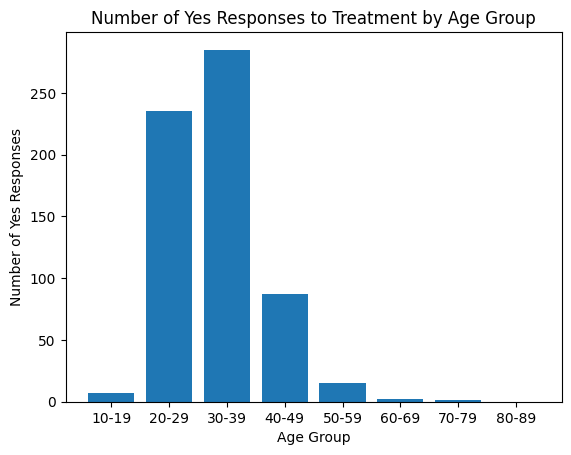

In [23]:


import matplotlib.pyplot as plt

age_groups = []
yes_responses = []

for i in range(10, 90, 10):
  age_group = f"{i}-{i+9}"
  age_groups.append(age_group)

  # Filter data for the current age group
  filtered_data = mh_data[(mh_data['Age'] >= i) & (mh_data['Age'] < i+10)]

  # Count the number of "Yes" responses for treatment
  yes_count = filtered_data['treatment'].value_counts().get("Yes", 0)
  yes_responses.append(yes_count)

plt.bar(age_groups, yes_responses)
plt.xlabel("Age Group")
plt.ylabel("Number of Yes Responses")
plt.title("Number of Yes Responses to Treatment by Age Group")
plt.show()


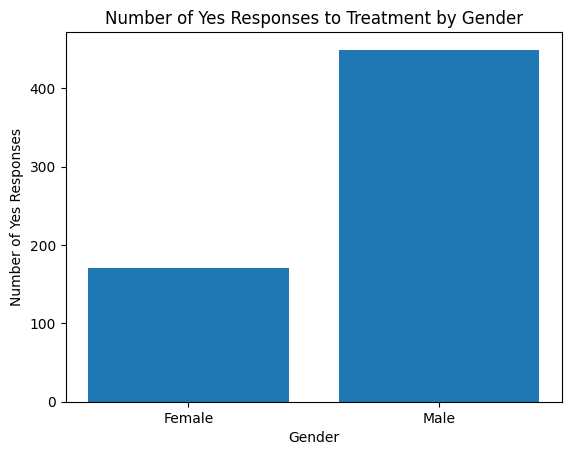

In [30]:
genders = []
yes_responses = []

mh_data['Gender'] = mh_data['Gender'].replace(['m', 'male', 'Male ', 'M', 'Man', 'cis male', 'Cis Male',
                                                'Cis Man', 'Make', 'Male (CIS)', 'Malr', 'msle', 'Mail', 'Mal',
                                                'maile'], 'Male')
mh_data['Gender'] = mh_data['Gender'].replace(['f', 'female', 'Female ', 'F', 'Woman', 'woman', 'Female (cis)',
                                                'cis-female/femme', 'Cis Female', 'femail', 'Femake'], 'Female')

filtered_data = mh_data[mh_data['Gender'].isin(["Male", "Female"])]

genders = filtered_data['Gender'].unique()
yes_responses = []

for gender in genders:
    # Filter data for the current gender
    gender_data = filtered_data[filtered_data['Gender'] == gender]

    # Count the number of "Yes" responses for treatment
    yes_count = gender_data['treatment'].value_counts().get("Yes", 0)
    yes_responses.append(yes_count)

plt.bar(genders, yes_responses)
plt.xlabel("Gender")
plt.ylabel("Number of Yes Responses")
plt.title("Number of Yes Responses to Treatment by Gender")
plt.show()


In [31]:
country_counts = mh_data[mh_data['treatment'] == 'Yes']['Country'].value_counts()

highest_country = country_counts.index[0]
highest_count = country_counts.iloc[0]

lowest_country = country_counts.index[-1]
lowest_count = country_counts.iloc[-1]

print(f"Country with highest 'Yes' responses: {highest_country} ({highest_count})")
print(f"Country with lowest 'Yes' responses: {lowest_country} ({lowest_count})")

Country with highest 'Yes' responses: United States (410)
Country with lowest 'Yes' responses: Finland (1)
